<a href="https://colab.research.google.com/github/IkutoYoshioka/AI-/blob/main/%E5%BF%9C%E7%94%A8%E3%83%9E%E3%82%AF%E3%83%AD%E3%82%BC%E3%83%9F_%E5%90%89%E5%B2%A1%E6%83%9F%E9%83%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第１章：回帰分析の目的
## 1.2 回帰と予測


In [3]:
from google.colab import files
uploaded = files.upload()

Saving women.csv to women.csv


In [5]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['women.csv']))
df

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126
5,63,129
6,64,132
7,65,135
8,66,139
9,67,142


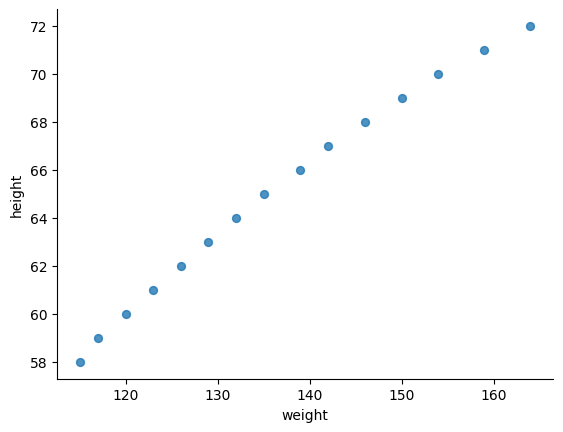

In [10]:
# @title height vs weight

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='weight', y='height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

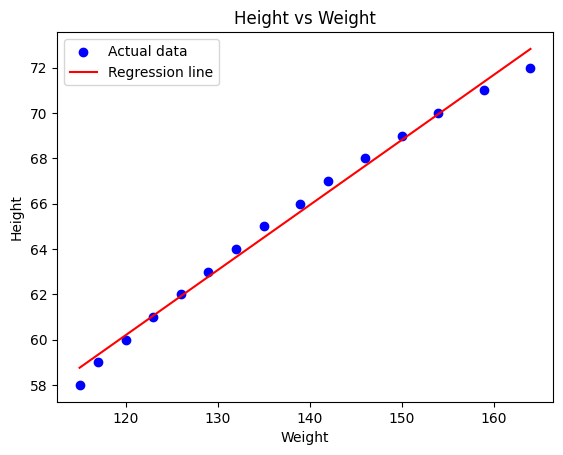

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

# X:説明変数、y:被説明変数
# .values その列の値をNumpy配列として取得
# .reshape(-1,1) 配列を2次元配列に変換し、列数を1に固定。-1は行数を列数に基づいて自動的に決める。
X = df['weight'].values.reshape(-1,1)
y = df['height'].values

#モデル選択
model = LinearRegression()

#モデルの学習、最小二乗法で誤差の最小化を行う。
model.fit(X, y)

#予測
y_pred = model.predict(X)

# scatterで散布図を指定。
plt.scatter(X, y, color='blue', label='Actual data')

# 回帰直線
plt.plot(X, y_pred, color='red', label='Regression line')

plt.title('Height vs Weight')
plt.xlabel('Weight')
plt.ylabel('Height')

plt.legend()

plt.show()

In [13]:
# 回帰係数（傾きと切片）を取得する
slope = model.coef_[0]
intercept = model.intercept_

# 回帰式を表示する
print(f"回帰式: 身長 = {slope:.4f} * 体重 + {intercept:.4f}")

回帰式: 身長 = 0.2872 * 体重 + 25.7235


* 0.2872 : 変数 Weight の回帰係数
* 回帰係数の大きさは、変数 Weight と Height の相関関係を表す。
* **回帰式はデータの因果関係ではなく相関関係の定式化**




## 1.3 自然科学のデータと社会科学のデータ
### 1.3.1 社会科学の難しさ
>YだけでなくXまでもが社会や個人に選ばれてしまう。
### 1.3.2 社会科学における実験


*   自然科学と同様の実験を行う（ex.実験経済学）
*   社会実験と見做せる事象のデータを得る
*   操作変数を見つける

